In [3]:
import sys
import os
# Add the project root to sys.path
sys.path.append(os.path.abspath('..'))

from Functions.gradientdescent_lib import *
from Functions.PLOT import plot
from Functions.bootstrap import *

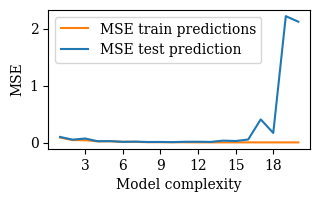

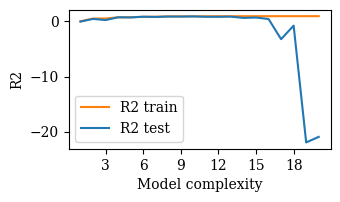

In [ ]:
np.random.seed(1)

n_points = 100

x_train, x_test, y_train, y_test = generateData(n_points, noise = 0.1)
x_train = x_train.flatten(); x_test = x_test.flatten()

n_degrees = 20
poly_degrees = list(range(1, n_degrees+1))

noIntercept = False

MSEs_train = np.zeros(len(poly_degrees), dtype=float)
MSEs_test = np.zeros(len(poly_degrees), dtype=float)

R2s_train = np.zeros(len(poly_degrees), dtype=float)
R2s_test = np.zeros(len(poly_degrees), dtype=float)

for p in poly_degrees:
    X_train = featureMat(x_train, p, noIntercept=noIntercept)
    X_test = featureMat(x_test, p, noIntercept=noIntercept)

    theta = theta_analytic_OLS(X_train, y_train)
    y_train_pred = X_train @ theta
    y_test_pred = X_test @ theta

    MSE_train = MSE(y_train, y_train_pred)
    MSE_test = MSE(y_test, y_test_pred)

    R2_train = R2(y_train, y_train_pred)
    R2_test = R2(y_test, y_test_pred)

    MSEs_train[p-1] = MSE_train
    MSEs_test[p-1] = MSE_test

    R2s_train[p-1] = R2_train
    R2s_test[p-1] = R2_test


plot(
    nGraphs = 2,
    x_axis_array = poly_degrees,
    y_features = [MSEs_train, MSEs_test],
    y_feature_label = ['MSE train predictions', 'MSE test prediction'],
    foldername = 'figures',
    figurename = f'MSE_train_test',
    x_label = 'Model complexity',
    y_label = 'MSE',
    title = '',
    x_integer_entries = True,
    y_integer_entries = False,
    save = True,
    scatter = None,
    multiX = False,
    y_logplot = True
)


plot(
    nGraphs = 2,
    x_axis_array = poly_degrees,
    y_features = [R2s_train, R2s_test],
    y_feature_label = ['R2 train', 'R2 test'],
    foldername = 'figures',
    figurename = f'R2_train_test',
    x_label = 'Model complexity',
    y_label = 'R2',
    title = '',
    x_integer_entries = True,
    y_integer_entries = False,
    save = True,
    scatter = None,
    multiX = False,
    y_logplot = True
)